<a href="https://colab.research.google.com/github/Martincitok/OFDM/blob/main/Trabajo_Integrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aqui empieza el código
# **OFDM (Orthogonal Frequency-Division Multiplexing)**

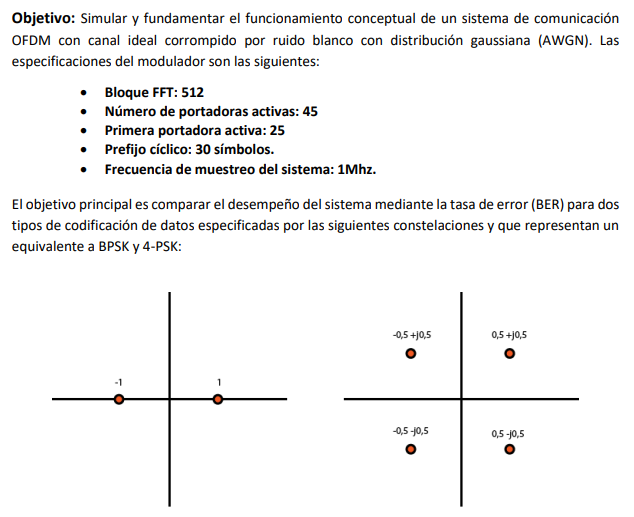


El esquema de OFDM a implementar se muestra a continuación:

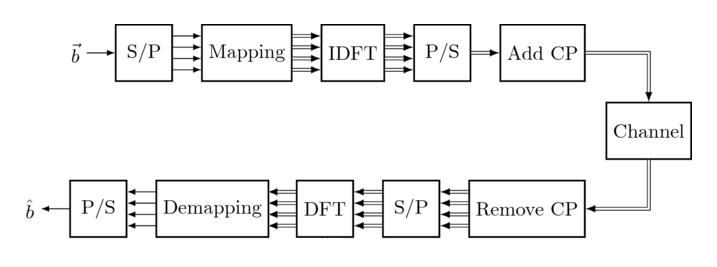

A continuacion se presenta el código:























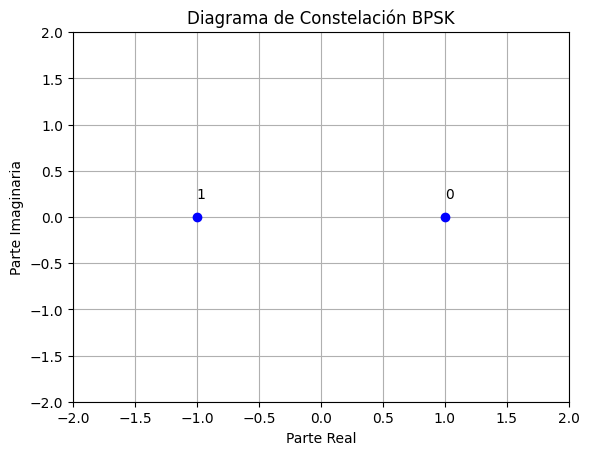

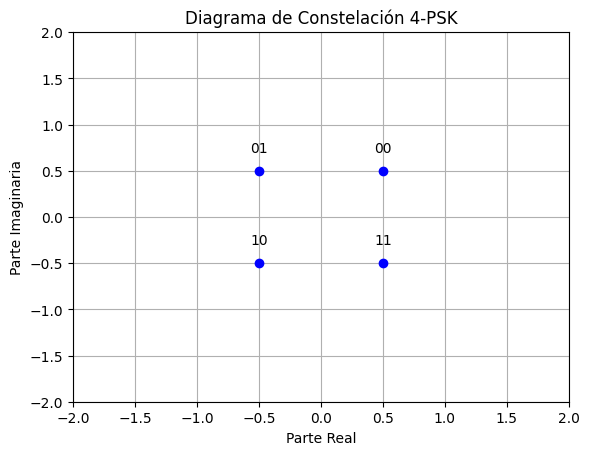

In [ ]:
#Importación de librerias.
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import pchip

#Definición de las tablas de mapeo, que asigna la relación entre los símbolos y la constelación.
mapping_table_4PSK = {
    (0,0) : 0.5+0.5j,
    (0,1) : -0.5+0.5j,
    (1,0) : -0.5+-0.5j,
    (1,1) : 0.5-0.5j,
}

mapping_table_BPSK = {
    (0) : 1+0j,
    (1) : -1+0j,
}

#Definición de variables globales.

#Frecuencia de muestreo.
Sample_frequency = 1000000

#Longitud del prefijo cíclico.
Cyclic_prefix_len = 30

#Tamaño del arreglo de datos (debe ser potencia de 2).
Data_size = 512

#Primer portadora activa (debe ser menor que Data_size/2).
First_carrier = 25

#Numero de portadoras activas (First_carrier + Active_carriers < Data_size/2).
Active_carriers = 45

#Indice de modulación, que es la cantidad de bits para cada símbolo.
modulation_index_4PSK = 2
modulation_index_BPSK = 1

#Se realiza una gráfica de las constelaciones a utilizar.
plt.figure(1)
for k, v in mapping_table_BPSK.items():
      plt.plot(v.real, v.imag, 'bo')
      plt.text(v.real, v.imag+0.2, "".join(str(k)))
plt.grid(True)
plt.xlim((-2, 2)); plt.ylim((-2,2)); plt.xlabel('Parte Real'); plt.ylabel('Parte Imaginaria')
plt.title('Diagrama de Constelación BPSK');

plt.figure(2)
for b3 in [0, 1]:
    for b2 in [0, 1]:
      B = (b3, b2)
      Q = mapping_table_4PSK[B]
      plt.plot(Q.real, Q.imag, 'bo')
      plt.text(Q.real, Q.imag+0.2, "".join(str(x) for x in B), ha='center')
plt.grid(True)
plt.xlim((-2, 2)); plt.ylim((-2,2)); plt.xlabel('Parte Real'); plt.ylabel('Parte Imaginaria')
plt.title('Diagrama de Constelación 4-PSK');

2da Parte
# **Arreglo de Datos:**

En la siguiente seccion se realiza el armado del arreglo de datos que se quiere enviar mediante OFDM, el mismo debe ser de una longitud igual a una potencia de 2.


Para que al realizar la Transformada Rápida de Fourier inversar se obtenga una señal puramente real en el tiempo, el espectro de la señal debe tener simetría hermitiana. Esto implica que dada una componente de frecuencia f en el espectro, su equivalente negativo es el complejo conjugado:

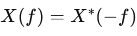

En este caso, cuando se tiene un arreglo de datos de longitud Data_size, como la longitud del arreglo es par (potencia de 2), entonces la frecuencia de muestreo se encuentra en (Data_size-1), mientras que la frecuencia de Nyquist se encuentra en (Data_size/2).

La funcion ifft() que se utiliza requiere ordenar el arreglo de datos de la siguiente manera:

*   El elemento a[0] debe contener el dato con frecuencia 0 o componente continua. Para lograr la simetria hermitiana la componente imaginaria debe ser nula.
*   De a[1] hasta a[Data_size/2] debe contener los terminos de frecuencia positiva del espectro (es decir desde 1 hasta la frecuencia de Nyquist).
*   De a[Data_size/2+1] hasta a[Data_size-1] debe contener los terminos de frecuencia negativa del espectro (es decir, desde un valor menos negativo de la frecuencia negativa de Nyquist hasta un valor antes del 0).

Además, hay que tener en cuenta que el término a[Data_size/2] representa la suma de los valores que hay en la frecuencia de Nyquist positiva y negativa. En caso de simetría hermitiana la componente imaginaria debe ser nula.


El arreglo de datos generado con la constelación BPSK es:

 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j -1.+0.j
  1.+0.j  1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j
 -1.+0.j -1.+0.j  1.+0.j -1.+0.j -1.+0.j  1.+0.j  1.+0.j  1.+0.j -1.+0.j
 -1.+0.j -1.+0.j -1.+0.j  1.+0.j  1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j
 -1.+0.j  1.+0.j -1.+0.j  1.+0.j  1.+0.j -1.+0.j  1.+0.j  1.+0.j  1.+0.j
 -1.+0.j  1.+0.j -1.+0.j -1.+0.j -1.+0.j  1.+0.j -1.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j

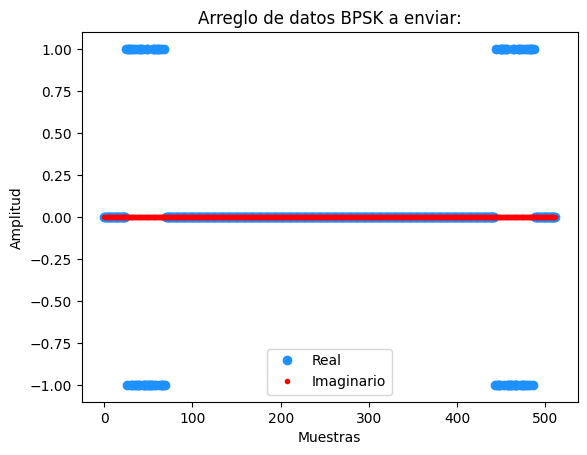



El arreglo de datos generado con la constelación 4-PSK es:

 [ 0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j
  0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j
  0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j
  0. +0.j   0. +0.j   0. +0.j   0. +0.j  -0.5+0.5j -0.5-0.5j -0.5-0.5j
  0.5+0.5j -0.5-0.5j  0.5+0.5j -0.5+0.5j -0.5+0.5j -0.5-0.5j  0.5-0.5j
 -0.5+0.5j -0.5+0.5j -0.5-0.5j -0.5-0.5j -0.5+0.5j  0.5+0.5j  0.5+0.5j
 -0.5+0.5j -0.5+0.5j -0.5-0.5j  0.5-0.5j  0.5-0.5j  0.5-0.5j -0.5-0.5j
 -0.5+0.5j -0.5-0.5j -0.5+0.5j  0.5+0.5j  0.5+0.5j  0.5+0.5j -0.5-0.5j
 -0.5+0.5j -0.5+0.5j -0.5+0.5j  0.5+0.5j  0.5-0.5j -0.5+0.5j -0.5-0.5j
  0.5+0.5j  0.5-0.5j  0.5-0.5j  0.5+0.5j -0.5-0.5j  0.5+0.5j -0.5-0.5j
  0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j
  0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j
  0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j
  0. +0.j   0. +0.j 

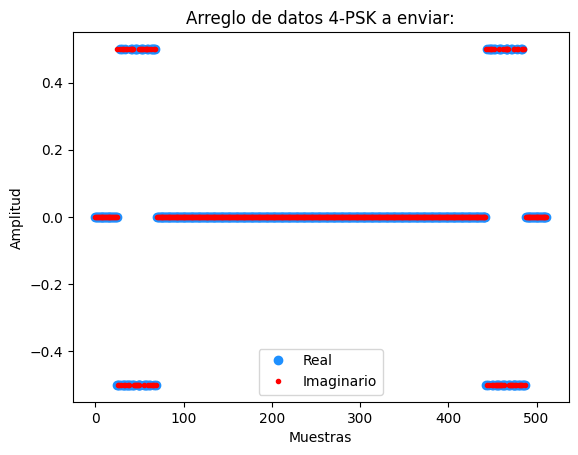

In [ ]:
#Se generan una cadena de bits al azar de longitud modulation_index * Active_carriers para cada mensaje.
bits_1 = np.random.binomial(n=1, p=0.5, size=(Active_carriers * modulation_index_BPSK, ))
bits_2 = np.random.binomial(n=1, p=0.5, size=(Active_carriers * modulation_index_4PSK, ))

#Se agrupan los bits en símbolos de longitud modulation_index.
#En el caso de la constelación BPSK no es necesario ya que cada bits es un símbolo.
bits_2_SP = bits_2.reshape(Active_carriers, modulation_index_4PSK)

#Cada símbolo se mapea a la constelacion definida.
_BPSK = np.array([mapping_table_BPSK[b] for b in bits_1])
_4PSK = np.array([mapping_table_4PSK[tuple(b)] for b in bits_2_SP])

#Se generan dos arreglos que van desde 0 a Data_size/2 y cada uno
#se rellena con el resultado del mapeo realizado anteriormente.
message_1 = np.zeros(shape = Data_size // 2 + 1, dtype=complex)
np.put(message_1, [range(First_carrier, First_carrier + Active_carriers, 1)], _BPSK)

message_2 = np.zeros(shape = Data_size // 2 + 1, dtype=complex)
np.put(message_2, [range(First_carrier, First_carrier + Active_carriers, 1)], _4PSK)

#Se obtiene el arreglo total de longitud Data_size concatenando el conjugado del arreglo anterior para lograr
#la simetria Hermitiana, teniendo en cuenta lo explicado en el anterior apartado teórico.
message_1 = np.concatenate((message_1, np.flip(np.conjugate(message_1[1 : Data_size // 2]))))
message_1[Data_size // 2] = message_1[Data_size // 2] + np.conjugate(message_1[Data_size // 2])

message_2 = np.concatenate((message_2, np.flip(np.conjugate(message_2[1 : Data_size // 2]))))
message_2[Data_size // 2] = message_2[Data_size // 2] + np.conjugate(message_2[Data_size // 2])

#Se imprime los arreglos de datos.
print("El arreglo de datos generado con la constelación BPSK es:\n\n", message_1, '\n\n')
print("La longitud del arreglo de datos BPSK generado es: ",np.size(message_1), '\n\n')

plt.figure(3)
plt.title('Arreglo de datos BPSK a enviar:')
plt.plot(np.arange(len(message_1)), message_1.real, 'o', label = "Real", color="dodgerblue")
plt.plot(np.arange(len(message_1)), message_1.imag, '.', label = "Imaginario", color="red")
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

print("\n\nEl arreglo de datos generado con la constelación 4-PSK es:\n\n", message_2, '\n\n')
print("La longitud del arreglo de datos 4-PSK generado es: ",np.size(message_2), '\n\n')

plt.figure(4)
plt.title('Arreglo de datos 4-PSK a enviar:')
plt.plot(np.arange(len(message_2)), message_2.real, 'o', label = "Real", color="dodgerblue")
plt.plot(np.arange(len(message_2)), message_2.imag, '.', label = "Imaginario", color="red")
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

3era Parte
# **IFFT y Prefijo Cíclico:**

En la siguiente sección se realiza la Transformada Rápida de Fourier Inversa para obtener las señales que se quieren enviar por el canal en el dominio del tiempo. Además, se agrega el prefijo cíclico a cada señal ya una vez en el dominio del tiempo. Para esto, se toma una cierta cantidad de muestras del final de la señal y se concatenan estas muestras al comienzo de la misma:

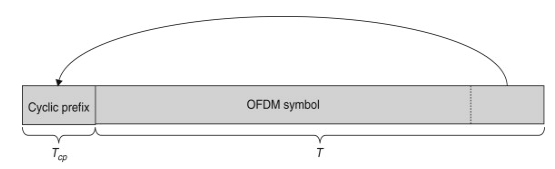

La FFT del arreglo de datos BPSK enviado es:

 [-0.0381172 +0.j -0.03050013+0.j -0.01229202+0.j  0.00702589+0.j
  0.01835383+0.j  0.01756767+0.j  0.00718987+0.j -0.00556409+0.j
 -0.01303805+0.j -0.01120228+0.j -0.00136674+0.j  0.01112333+0.j
  0.02013629+0.j  0.02192656+0.j  0.0165264 +0.j  0.00691437+0.j
 -0.00313293+0.j -0.01099027+0.j -0.0158364 +0.j -0.0179651 +0.j
 -0.01763421+0.j -0.01451813+0.j -0.00821309+0.j  0.00067793+0.j
  0.00989361+0.j  0.01606565+0.j  0.01637879+0.j  0.01036891+0.j
  0.00063349+0.j -0.00818598+0.j -0.01171875+0.j -0.00818598+0.j
  0.00063349+0.j  0.01036891+0.j  0.01637879+0.j  0.01606565+0.j
  0.00989361+0.j  0.00067793+0.j -0.00821309+0.j -0.01451813+0.j
 -0.01763421+0.j -0.0179651 +0.j -0.0158364 +0.j -0.01099027+0.j
 -0.00313293+0.j  0.00691437+0.j  0.0165264 +0.j  0.02192656+0.j
  0.02013629+0.j  0.01112333+0.j -0.00136674+0.j -0.01120228+0.j
 -0.01303805+0.j -0.00556409+0.j  0.00718987+0.j  0.01756767+0.j
  0.01835383+0.j  0.00702589+0.j -0.0122920

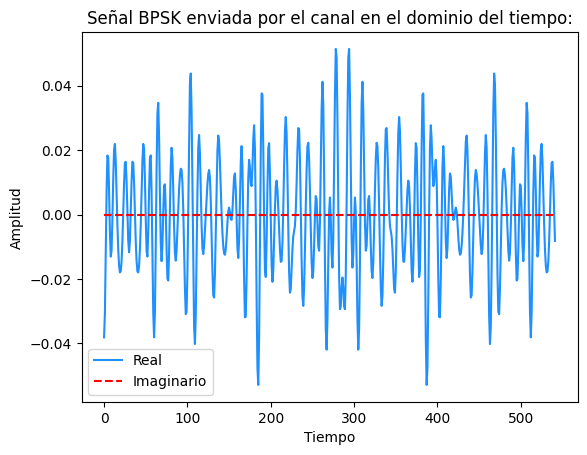


El valor pico de la señal BPSK sin ruido es: 0.052887054204273115


El valor RMS de la señal BPSK sin ruido es: 0.018365610967691674


El PAPR de la señal BPSK enviada es: 9.186879940558311 dB 




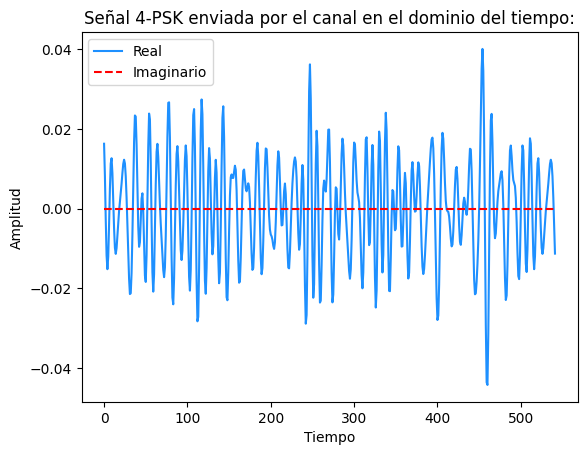


El valor pico de la señal 4-PSK sin ruido es: 0.044199330777771245


El valor RMS de la señal 4-PSK sin ruido es: 0.012909194936152868


El PAPR de la señal 4-PSK enviada es: 10.690330696004448 dB 


La tasa de bits para la señal de constelación BPSK es: 83025.8302583026 bps.
La tasa de bits para la señal de constelación 4PSK es: 166051.6605166052 bps.
La velocidad de transmisión para ambas constelaciones es: 83025.8302583026 baudios.


In [ ]:
#Se realiza la Transformada Rapida de Fourier Inversa sobre el arreglo de datos.
#Como los arreglos tienen simetría hermitiana, en el dominio del tiempo ambas señales deben ser reales puras.
Time_signal_1 = np.fft.ifft(message_1, n = Data_size)
Time_signal_2 = np.fft.ifft(message_2, n = Data_size)

#Se agrega a cada señal el prefijo ciclico.
Cyclic_prefix = Time_signal_1[-Cyclic_prefix_len:]
Time_signal_1 = np.hstack([Cyclic_prefix, Time_signal_1])

Cyclic_prefix = Time_signal_2[-Cyclic_prefix_len:]
Time_signal_2 = np.hstack([Cyclic_prefix, Time_signal_2])

#Se realiza la gráfica de la señal en el dominio del tiempo y se calcula el PAPR.
print("La FFT del arreglo de datos BPSK enviado es:\n\n", Time_signal_1, '\n\n')

print("La FFT del arreglo de datos 4-PSK enviado es:\n\n", Time_signal_2, '\n\n')

plt.figure(5)
plt.title('Señal BPSK enviada por el canal en el dominio del tiempo:')
plt.plot(np.arange(len(Time_signal_1)), Time_signal_1.real, '-', label = "Real", color="dodgerblue")
plt.plot(np.arange(len(Time_signal_1)), Time_signal_1.imag, '--', label = "Imaginario", color="red")
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

print("\nEl valor pico de la señal BPSK sin ruido es:", np.max(np.abs(Time_signal_1.real)))
print("\n\nEl valor RMS de la señal BPSK sin ruido es:", np.sqrt(np.mean(np.square(Time_signal_1.real))))
print("\n\nEl PAPR de la señal BPSK enviada es:", 10*np.log10(np.max(np.abs(Time_signal_1.real))**2 / np.mean(np.square(Time_signal_1.real))), 'dB \n\n')

plt.figure(6)
plt.title('Señal 4-PSK enviada por el canal en el dominio del tiempo:')
plt.plot(np.arange(len(Time_signal_2)), Time_signal_2.real, '-', label = "Real", color="dodgerblue")
plt.plot(np.arange(len(Time_signal_2)), Time_signal_2.imag, '--', label = "Imaginario", color="red")
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

print("\nEl valor pico de la señal 4-PSK sin ruido es:", np.max(np.abs(Time_signal_2.real)))
print("\n\nEl valor RMS de la señal 4-PSK sin ruido es:", np.sqrt(np.mean(np.square(Time_signal_2.real))))
print("\n\nEl PAPR de la señal 4-PSK enviada es:", 10*np.log10(np.max(np.abs(Time_signal_2.real))**2 / np.mean(np.square(Time_signal_2.real))), 'dB \n\n')

#Se calcula la tasa y la velocidad de transmisión de bits.
print("La tasa de bits para la señal de constelación BPSK es:", len(bits_1)/((Data_size+Cyclic_prefix_len)/Sample_frequency), "bps.")
print("La tasa de bits para la señal de constelación 4PSK es:", len(bits_2)/((Data_size+Cyclic_prefix_len)/Sample_frequency), "bps.")
print("La velocidad de transmisión para ambas constelaciones es:", Active_carriers/((Data_size+Cyclic_prefix_len)/Sample_frequency), "baudios.")


4ta Parte
# **Diagrama de Densidad Espectral de Potencia:**

En la siguiente seccion de código, se obtiene la gráfica del espectro de cada señal presente en el canal, previo a la adición de ruido. Para esto, se utiliza el diagrama de densidad de potencia del espectro.

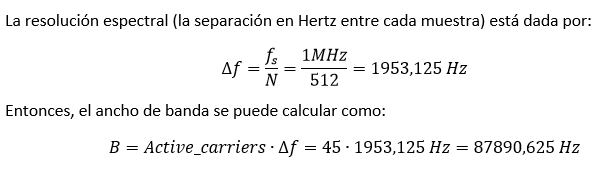


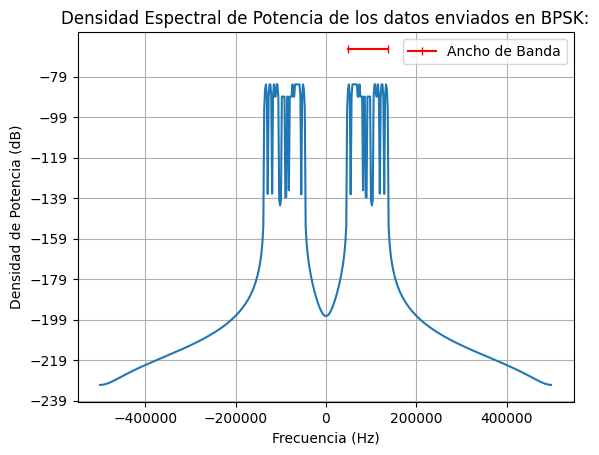

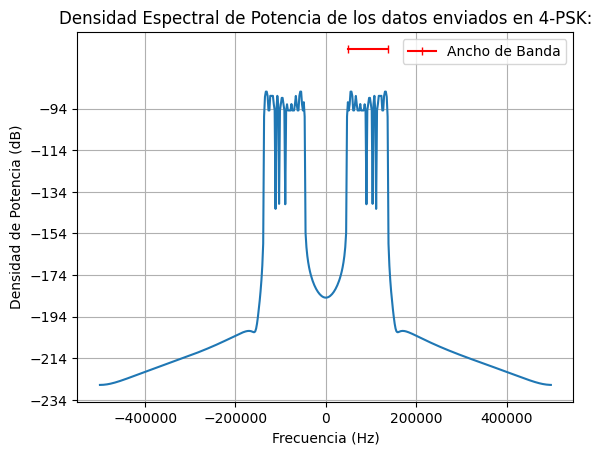



El ancho de banda transmitido es:  87890.625  Hz


La resolución espectral es:  1953.125  Hz


Las frecuencias (positivas) de cada muestra son: 

 [     0.      1953.125   3906.25    5859.375   7812.5     9765.625
  11718.75   13671.875  15625.     17578.125  19531.25   21484.375
  23437.5    25390.625  27343.75   29296.875  31250.     33203.125
  35156.25   37109.375  39062.5    41015.625  42968.75   44921.875
  46875.     48828.125  50781.25   52734.375  54687.5    56640.625
  58593.75   60546.875  62500.     64453.125  66406.25   68359.375
  70312.5    72265.625  74218.75   76171.875  78125.     80078.125
  82031.25   83984.375  85937.5    87890.625  89843.75   91796.875
  93750.     95703.125  97656.25   99609.375 101562.5   103515.625
 105468.75  107421.875 109375.    111328.125 113281.25  115234.375
 117187.5   119140.625 121093.75  123046.875 125000.    126953.125
 128906.25  130859.375 132812.5   134765.625 136718.75  138671.875
 140625.    142578.125 144531.25  146484.375 14

In [ ]:
#Se obtiene el espectro de densidad de potencia de la señal enviada previo a la adición del ruido blanco y del prefijo.
plt.figure(7)
plt.title('Densidad Espectral de Potencia de los datos enviados en BPSK:')
Pxx, Frec = plt.psd(Time_signal_1[Cyclic_prefix_len:], NFFT = Data_size, sides = 'twosided', scale_by_freq = True, Fs = Sample_frequency)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad de Potencia (dB)')
x = [Frec[Data_size//2+First_carrier], Frec[Data_size//2+First_carrier+Active_carriers]]
y = [10*np.log10(Pxx[Data_size//2+First_carrier])+20, 10*np.log10(Pxx[Data_size//2+First_carrier])+20]
plt.plot(x, y, marker="|", color = "red", label = "Ancho de Banda")
plt.legend()
plt.show()

plt.figure(8)
plt.title('Densidad Espectral de Potencia de los datos enviados en 4-PSK:')
plt.psd(Time_signal_2[Cyclic_prefix_len:], NFFT = Data_size, sides = 'twosided', scale_by_freq = True, Fs = Sample_frequency)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad de Potencia (dB)')
plt.plot(x, y, marker="|", color = "red", label = "Ancho de Banda")
plt.legend()
plt.show()

print('\n\nEl ancho de banda transmitido es: ', (Frec[Data_size//2+First_carrier+Active_carriers] - Frec[Data_size//2+First_carrier]), ' Hz\n\n')

print('La resolución espectral es: ', Sample_frequency / Data_size, ' Hz\n\n')

print('Las frecuencias (positivas) de cada muestra son: \n\n', Frec[Data_size//2:])

5ta Parte
# **Agregado de Ruido Blanco:**

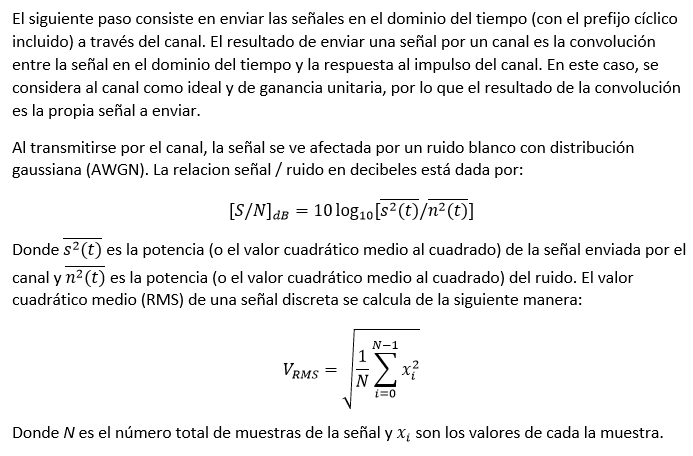



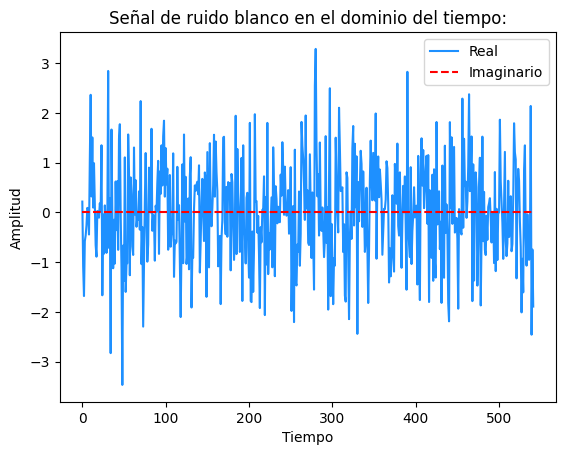

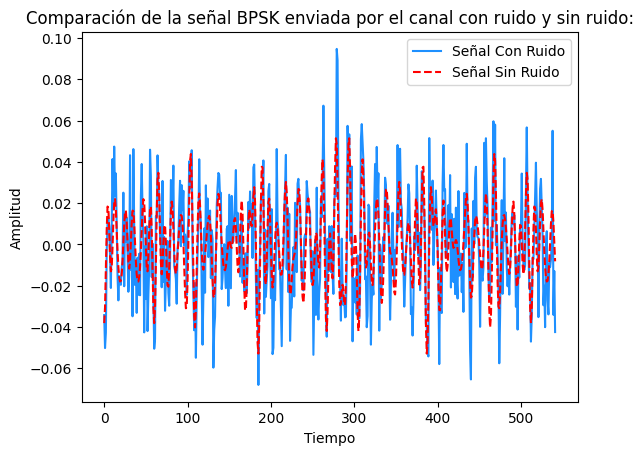

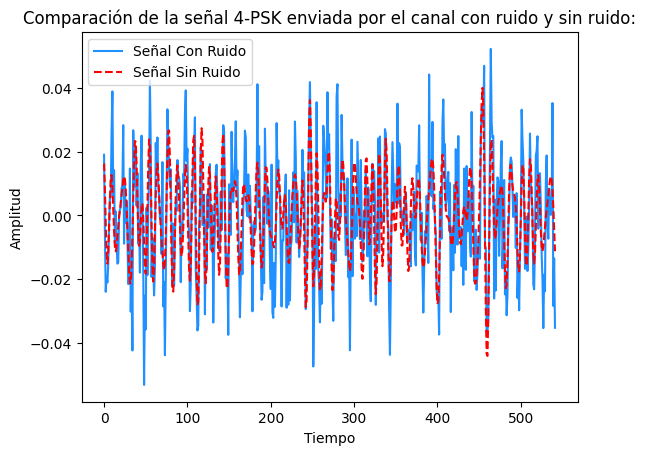

In [ ]:
#Se genera una señal de ruido blanco con distribución gaussiana (o distribución normal).
#En este caso, randn genera muestras de una distribución normal estándar (media cero y desvío estándar 1)
White_noise = np.random.randn(Data_size + Cyclic_prefix_len)

plt.figure(9)
plt.title('Señal de ruido blanco en el dominio del tiempo:')
plt.plot(np.arange(len(White_noise)), White_noise.real, '-', label = "Real", color="dodgerblue")
plt.plot(np.arange(len(White_noise)), White_noise.imag, '--', label = "Imaginario", color="red")
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

#Función para calcular el valor cuadrático medio de una señal.
def RMS(signal):
  return np.sqrt(np.mean(np.square(signal)))

#Definición de función para obtener el valor RMS del ruido blanco en función de la relación señal - ruido
#en decibeles y el valor cuadrático medio de la señal que se está enviando por el canal.
def White_noise_RMS(SNRdb, Time_signal):
  return np.sqrt(np.mean(np.square(Time_signal)) / 10**(SNRdb/10))


#Se cambia el valor RMS del ruido blanco en función de la relación señal - ruido buscada (en este caso 0 dB)
#y se suma el ruido a las señales que se envian por el canal.
White_noise_1 = White_noise*(White_noise_RMS(0, Time_signal_1)/RMS(White_noise))
White_noise_2 = White_noise*(White_noise_RMS(0, Time_signal_2)/RMS(White_noise))

Time_signal_noise_1 = Time_signal_1 + White_noise_1
Time_signal_noise_2 = Time_signal_2 + White_noise_2


#Se realiza las gráficas comparativas para cada señal con y sin ruido.
plt.figure(10)
plt.title('Comparación de la señal BPSK enviada por el canal con ruido y sin ruido:')
plt.plot(np.arange(len(Time_signal_noise_1)), Time_signal_noise_1.real, '-', label = "Señal Con Ruido", color="dodgerblue")
plt.plot(np.arange(len(Time_signal_1)), Time_signal_1.real, '--', label = "Señal Sin Ruido", color="red")
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.show()


plt.figure(11)
plt.title('Comparación de la señal 4-PSK enviada por el canal con ruido y sin ruido:')
plt.plot(np.arange(len(Time_signal_noise_2)), Time_signal_noise_2.real, '-', label = "Señal Con Ruido", color="dodgerblue")
plt.plot(np.arange(len(Time_signal_2)), Time_signal_2.real, '--', label = "Señal Sin Ruido", color="red")
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

6ta Parte
# **Recepción de las Señales:**

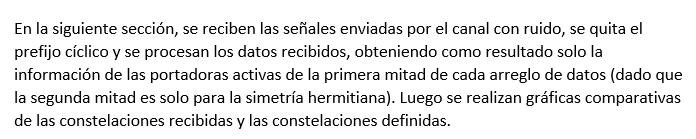

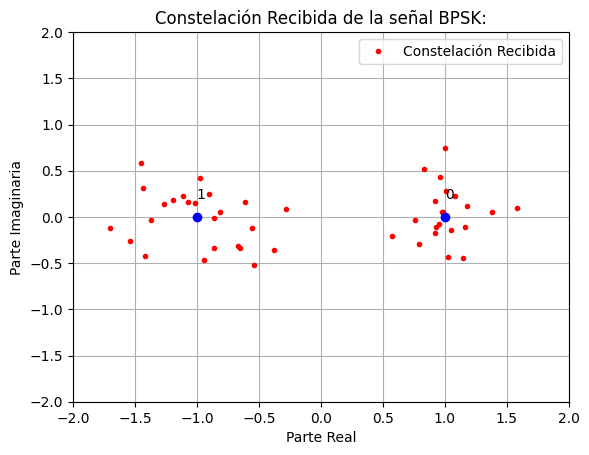

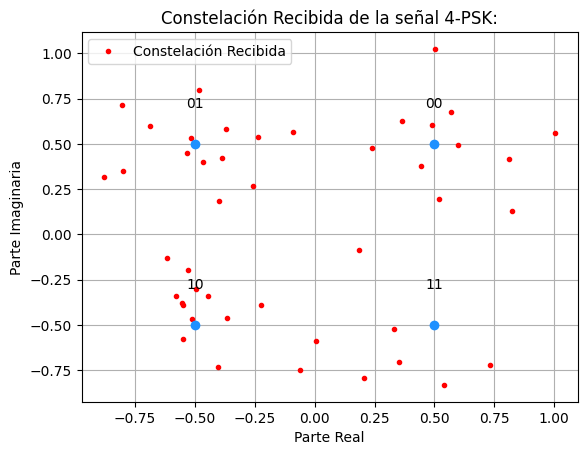

In [ ]:
#Se descarta el prefijo cíclico de cada señal.
Received_time_signal_1 = Time_signal_noise_1[Cyclic_prefix_len:]
Received_time_signal_2 = Time_signal_noise_2[Cyclic_prefix_len:]

#Se realiza la Transformada Rápida de Fourier de las señales recibidas sin prefijo cíclico.

Received_time_signal_1_spectrum = np.fft.fft(Received_time_signal_1)
Received_time_signal_2_spectrum = np.fft.fft(Received_time_signal_2)

#Se procesa la señal recibida. Los datos enviados están únicamente en la mitad del
#mensaje (la otra mitad es solo para la simetría hermitiana) y además los datos están
#en las posiciones que corresponden a las portadoras activas.

Received_data_1 = Received_time_signal_1_spectrum[First_carrier : First_carrier + Active_carriers]
Received_data_2 = Received_time_signal_2_spectrum[First_carrier : First_carrier + Active_carriers]

#Se realiza un gráfico de las constelaciones recibidas.
plt.figure(12)
plt.plot(Received_data_1.real, Received_data_1.imag, '.', color="red", label = "Constelación Recibida");
for k, v in mapping_table_BPSK.items():
      plt.plot(v.real, v.imag, 'bo')
      plt.text(v.real, v.imag+0.2, "".join(str(k)))
plt.grid(True)
plt.xlim((-2, 2)); plt.ylim((-2,2)); plt.xlabel('Parte Real'); plt.ylabel('Parte Imaginaria')
plt.title('Constelación Recibida de la señal BPSK:');
plt.legend()
plt.show()

plt.figure(13)
plt.plot(Received_data_2.real, Received_data_2.imag, '.', color="red", label = "Constelación Recibida");
plt.grid(True); plt.xlabel('Parte Real'); plt.ylabel('Parte Imaginaria'); plt.title("Constelación Recibida de la señal 4-PSK:");
for b3 in [0, 1]:
    for b2 in [0, 1]:
      B = (b3, b2)
      Q = mapping_table_4PSK[B]
      plt.plot(Q.real, Q.imag, 'o', color="dodgerblue")
      plt.text(Q.real, Q.imag+0.2, "".join(str(x) for x in B), ha='center')
plt.legend()
plt.show()

7ma Parte
# **Obtención de las Cadenas de Bits Recibidas:**

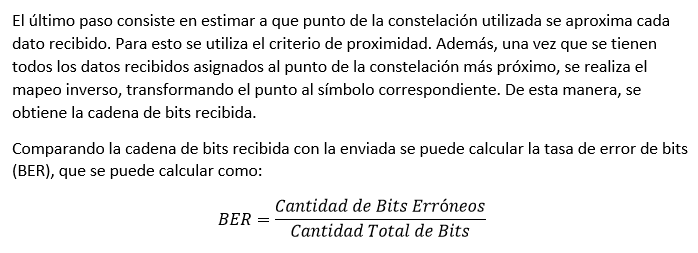


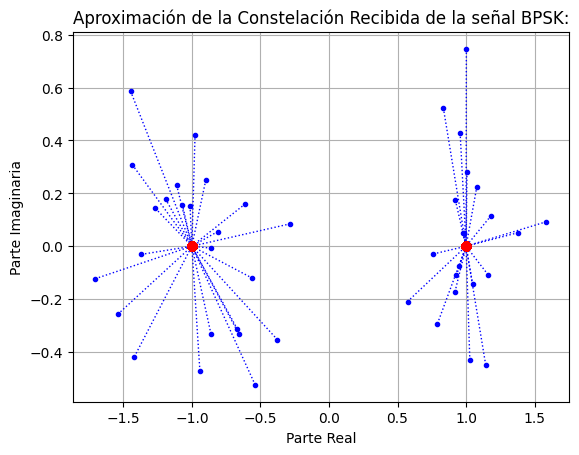

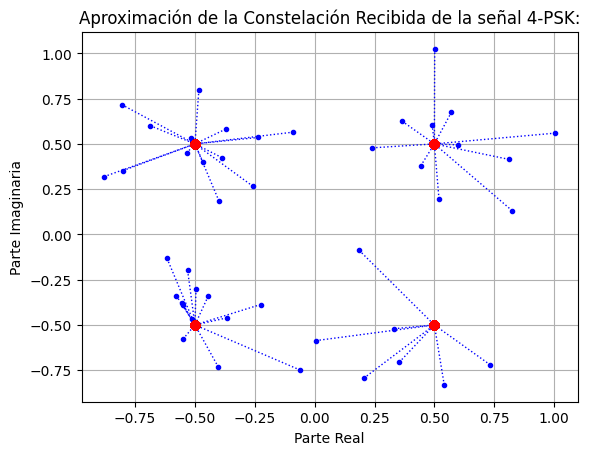



La tasa de error de bits para BPSK es:  0.0 %


La tasa de error de bits para 4-PSK es:  0.0 %




In [ ]:
#Se define la tabla de mapeo inverso para cada constelación, que es simplemente
#invertir las llaves y los valores del diccionario que representa la tabla de mapeo original.
demapping_table_BPSK = {v : k for k, v in mapping_table_BPSK.items()}
demapping_table_4PSK = {v : k for k, v in mapping_table_4PSK.items()}

#Función que se utiliza para estimar a que punto de la constelación corresponde cada dato recibido y
#para realizar el mapeo inverso (convertir el punto de la constelación a su símbolo correspondiente).
def PSK_demapping(Received_data, demapping_table):

    #Se obtiene un arreglo con las posibles constelaciones definidas en la tabla de mapeo.
    Constellation = np.array([x for x in demapping_table.keys()])

    """
    Los datos recibidos se encuentran en un arreglo unidimensional de 45 elementos (o Active_carriers elementos).
    Se realiza un reshape para cambiar la forma de este arreglo a una columna y 45 filas.
    Luego, se realiza un reshape del arreglo de constelación que originalmente es una lista de modulation_index elementos
    (4 para 4PSK y 2 para BPSK) para anidar dicha lista dentro de otra lista.
    Finalmente, al realizar la resta entre los dos arreglos reordenados se obtiene un nuevo arreglo de Active_carriers filas y modulation_index
    columnas, donde en cada fila se tiene las distancias entre el dato recibido y cada punto posible de la constelación definida.
    """
    Distance = abs(Received_data.reshape((-1,1)) - Constellation.reshape((1,-1)))

    #Para cada elemento recibido, se obtiene el índice de la columna del arreglo Distance en el que se encuentra la distancia
    #mínima del punto recibido al punto de la constelación mas cercano.
    Constellation_index = Distance.argmin(axis=1)

    #Los índices obtenidos anteriormente en Constellation_index también se corresponden con los índices del arreglo Constellation,
    #que tiene el valor de la constelación al cual se va a aproximar el dato recibido.
    #Se transforman los valores recibidos a los valores mas cercanos definidos en la constelación y se guardan dichos valores en un arreglo.
    Rounded_values = Constellation[Constellation_index]

    #Cada valor de la constelación se cambia por su símbolo correspondiente y se apilan dichos símbolos en un arreglo.
    #Se devuelve el arreglo que se corresponde con los símbolos recibidos y también los valores recibidos redondeados.
    return np.vstack([demapping_table[C] for C in Rounded_values]), Rounded_values

#Se realiza la estimación de los valores recibidos para cada señal.
Received_bits_1, Rounded_values_1 = PSK_demapping(Received_data_1, demapping_table_BPSK)
Received_bits_2, Rounded_values_2 = PSK_demapping(Received_data_2, demapping_table_4PSK)

#Se realiza las gráficas para observar a que punto de la constelación se aproximó cada dato recibido.
plt.figure(14)
for x, y in zip(Received_data_1, Rounded_values_1):
    plt.plot([x.real, y.real], [x.imag, y.imag], 'b.', linewidth=1, linestyle='dotted');
    plt.plot(Rounded_values_1.real, Rounded_values_1.imag, 'ro')
plt.grid(True); plt.xlabel('Parte Real'); plt.ylabel('Parte Imaginaria'); plt.title('Aproximación de la Constelación Recibida de la señal BPSK:');
plt.show()

plt.figure(15)
for x, y in zip(Received_data_2, Rounded_values_2):
    plt.plot([x.real, y.real], [x.imag, y.imag], 'b.', linewidth=1, linestyle='dotted');
    plt.plot(Rounded_values_2.real, Rounded_values_2.imag, 'ro')
plt.grid(True); plt.xlabel('Parte Real'); plt.ylabel('Parte Imaginaria'); plt.title('Aproximación de la Constelación Recibida de la señal 4-PSK:');
plt.show()

#Se calcula la tasa de error de bits (BER) para cada señal transmitida.
print ("\n\nLa tasa de error de bits para BPSK es: ", 100*np.sum(abs(bits_1-Received_bits_1.reshape((-1,))))/len(bits_1), '%\n\n')
print ("La tasa de error de bits para 4-PSK es: ", 100*np.sum(abs(bits_2-Received_bits_2.reshape((-1,))))/len(bits_2), '%\n\n')


8va Parte
# **Gráficas de BER para diferentes S/N:**

Finalmente, teniendo en cuenta lo desarrollado anteriormente, se puede obtener un gráfica de la tasa de errror de bits (BER) para diferentes valores de la relación señal / ruido.

In [ ]:
#Se define el rango en decibeles en el que se va a analizar la relación señal / ruido.
increment = 1
dB_range = np.arange(-20.0, 20.0 + increment, increment)

#Arreglos en los cuales se va a ir guardando los valores de BER para cada decibel.
BER_BPSK = np.array([])
BER_4PSK = np.array([])

#Se realiza una iteración por cada valor de SN en decibel buscado.
for SN in dB_range:

    #Se cambia el valor RMS del ruido para cumplir con el SN buscado.
    White_noise_BPSK = White_noise*(White_noise_RMS(SN, Time_signal_1)/RMS(White_noise))
    White_noise_4PSK = White_noise*(White_noise_RMS(SN, Time_signal_2)/RMS(White_noise))

    #A la señal enviada se le suma el ruido blanco.
    Time_signal_noise_BPSK = Time_signal_1 + White_noise_BPSK
    Time_signal_noise_4PSK = Time_signal_2 + White_noise_4PSK

    #Se recibe la señal y se quita el prefijo cíclico.
    Received_time_signal_BPSK = Time_signal_noise_BPSK[Cyclic_prefix_len:]
    Received_time_signal_4PSK = Time_signal_noise_4PSK[Cyclic_prefix_len:]

    #Se realiza la Transformada Rápida de Fourier a la señal recibida.
    Received_time_signal_BPSK_spectrum = np.fft.fft(Received_time_signal_BPSK)
    Received_time_signal_4PSK_spectrum = np.fft.fft(Received_time_signal_4PSK)

    #Se obtienen los datos de las portadoras activas.
    Received_data_BPSK = Received_time_signal_BPSK_spectrum[First_carrier : First_carrier + Active_carriers]
    Received_data_4PSK = Received_time_signal_4PSK_spectrum[First_carrier : First_carrier + Active_carriers]

    #Se estiman los valores recibidos a los puntos mas cecanos de cada constelación.
    Received_bits_BPSK, Rounded_values_BPSK = PSK_demapping(Received_data_BPSK, demapping_table_BPSK)
    Received_bits_4PSK, Rounded_values_4PSK = PSK_demapping(Received_data_4PSK, demapping_table_4PSK)

    #Se calcula el BER para la relación SN buscada.
    BER_BPSK = np.append(BER_BPSK, np.sum(abs(bits_1-Received_bits_BPSK.reshape((-1,))))/len(bits_1))
    BER_4PSK = np.append(BER_4PSK, np.sum(abs(bits_2-Received_bits_4PSK.reshape((-1,))))/len(bits_2))


#Si la probabilidad es mayor a 50% invertimos los bits y obtenemos el complemento de la probabilidad.
for x in range(0, len(BER_BPSK)) :
  if BER_BPSK[x] > 0.5 :
    BER_BPSK[x] = 1-BER_BPSK[x]
for x in range(0, len(BER_4PSK)) :
  if BER_4PSK[x] > 0.5 :
    BER_4PSK[x] = 1-BER_4PSK[x]

#Se realiza la gráfica de BER para cada constelación.
plt.figure(16)
Samples = np.array(range(len(BER_BPSK)))
xAxis = np.linspace(dB_range.min(), dB_range.max(), 100)
plt.plot(xAxis, pchip(dB_range, BER_BPSK)(xAxis), label = "BPSK", color="dodgerblue")
plt.plot(xAxis, pchip(dB_range, BER_4PSK)(xAxis), label = "4-PSK", color="red",)
plt.title('Gráfica de BER para Ambas Constelaciones:')
plt.xlabel('S/N [dB]')
plt.ylabel('BER')
plt.yscale('log')
plt.legend()
plt.show()

print("\n\nEl BER máximo calculado para la señal BPSK es: ", BER_BPSK[0]*100, "% con una relación S/N de ", dB_range[0], "dB")
print("El BER máximo calculado para la señal 4-PSK es: ", BER_4PSK[0]*100, "% con una relación S/N de ", dB_range[0], "dB")